In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

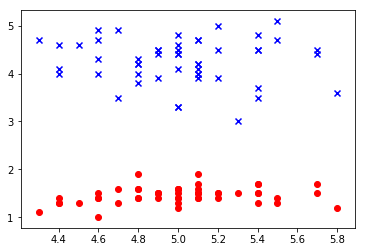

In [20]:
y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa',-1,1)
X=df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o')
plt.scatter(X[:50,0],X[50:100,1],color='blue',marker='x')
plt.show()

In [21]:
class Perceptron(object):
    def __init__(self,eta=.01,n_iter=10):
        self.eta = eta
        self.n_iter=n_iter
    def fit(self,X,y):
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update *xi
                self.w_[0] += update
                errors += int(update!=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,-1)
    

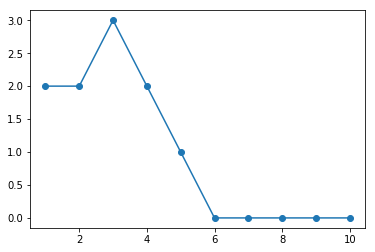

In [22]:
ppn=Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.show()

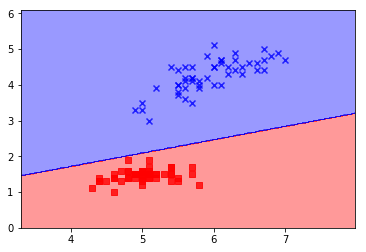

In [23]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min,x1_max = X[:,0].min() -1, X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1, X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                   alpha = .8, c=cmap(idx),marker=markers[idx],label=cl)
    #highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',alpha=1.0,linewidth=1,marker='o',s=55,label='test set')
        
plot_decision_regions(X,y,classifier=ppn)
plt.show()

In [24]:
from sklearn import datasets
iris = datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target

In [25]:
#划分测试集和训练集
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                X,y,test_size=0.3,random_state=0)

In [26]:
#标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

In [27]:
#感知器模型
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40,eta0=0.1,random_state=0)
ppn.fit(X_train_std,y_train)

C:\Users\feifei\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [28]:
#预测效果
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: {0}'.format((y_test!=y_pred).sum()))

Misclassified samples: 4


In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_test,y_pred))

Accuracy: 0.91


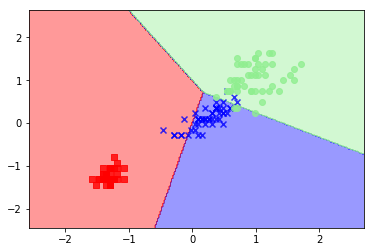

In [30]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X_combined_std,y_combined,ppn,test_idx=range(105,150))

In [31]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

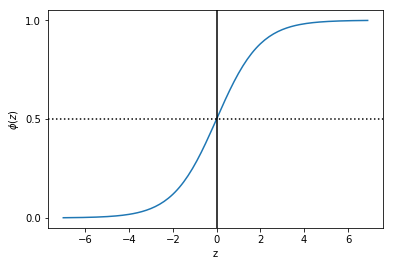

In [32]:
z=np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.axhspan(0.0,1.0,facecolor='1.0',alpha=1.0,ls='dotted')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.yticks([0,0.5,1])
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.show()

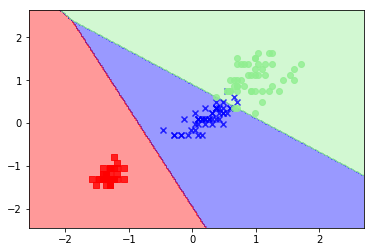

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,1))
plt.show()

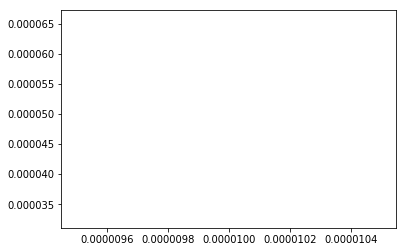

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [49]:
#绘制对两个权重系数进行L2正则化后的图像
weights,params=[],[]
for c in range(-5,5):
    lr=LogisticRegression(C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

    weights = np.array(weights)
    plt.plot(params,weights[:,0],label='petal length')
    plt.plot(params,weights[:,1],label='petal width',linestyle='--')
    plt.show()
 
          

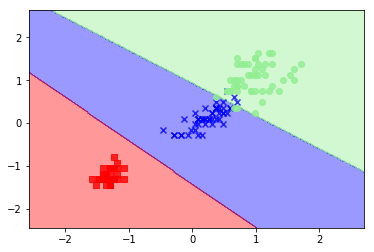

In [50]:
#SVM
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
